# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import joblib
import DiadFit as pf
pf.__version__

'1.0.1'

In [28]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [29]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,K20_c003_a1_FIA_r1_CRR_DiadFit,107.089351,1.143059,1282.189137,1.143041,274.056011,1282.189137,94.049791,0.144323,3.100173,...,1.000000,0.001552,0.001053,1.174242,1.216138,0.159456,0.003704,PseudoVoigtModel,PseudoVoigtModel,No
1,K20_c003_a1_FIA_r2,103.160565,0.012798,1286.136248,0.011065,132.774081,1286.136248,177.598641,0.537133,2.109338,...,1.081019,0.113937,0.008091,1.147727,1.191429,0.136082,0.003935,PseudoVoigtModel,PseudoVoigtModel,No
2,K20_c003_a1_FIA_r3,103.146610,0.011496,1286.151318,0.009741,150.589131,1286.151318,203.921426,0.500836,1.882628,...,1.171913,0.175842,0.006652,1.145098,1.229851,0.127236,0.003443,PseudoVoigtModel,PseudoVoigtModel,No
3,K20_c004_a3_FID_CRR_DiadFit,103.290856,0.012207,1285.841609,0.011783,236.259160,1285.841609,367.962863,0.578367,2.473822,...,1.243182,0.213273,0.004896,1.126183,1.130542,0.123640,0.002260,PseudoVoigtModel,PseudoVoigtModel,No
4,K20_c004_a3_FIE,103.268785,0.007566,1285.873620,0.007168,268.857943,1285.873620,411.308380,0.598292,2.465771,...,1.095541,0.119658,0.004451,1.146875,1.150852,0.149941,0.002098,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [30]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant','map','Series','broad'],
 sort=True)
diad_meta[0]

'004 FG04-A1-4-50X-start_r1.txt'

## Now get all the important information out of the metadata files

In [31]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 124/124 [00:00<00:00, 2001.72it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-4-50X-start_r1.txt,"January 10, 2025\n",January,10.0,6.002,45.0,5.0,50.0,"['0h', '3m', '46s']",11:35:01 AM\n,41701.0,1324.964
1,FG04-A1-4-50X-start_r2.txt,"January 10, 2025\n",January,10.0,5.977,45.0,5.0,50.0,"['0h', '3m', '46s']",11:39:43 AM\n,41983.0,1324.964
2,FG04-A1-4-50X-start_r3.txt,"January 10, 2025\n",January,10.0,5.960,45.0,5.0,50.0,"['0h', '3m', '46s']",11:45:31 AM\n,42331.0,1324.964
3,FG04-A1-4-100X-start_r4.txt,"January 10, 2025\n",January,10.0,5.971,45.0,3.0,100.0,"['0h', '2m', '16s']",11:57:33 AM\n,43053.0,1324.964
4,FG04-A1-4-100X-start_r5.txt,"January 10, 2025\n",January,10.0,5.982,45.0,5.0,100.0,"['0h', '3m', '46s']",12:04:40 PM\n,43480.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [32]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-4-50X-start_r1'

In [33]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['FG04-A1-4-50X-start_r1', 'FG04-A1-4-50X-start_r2',
       'FG04-A1-4-50X-start_r3', 'FG04-A1-4-100X-start_r4',
       'FG04-A1-4-100X-start_r5', 'FG04-A1-4-100X-start_r6',
       'K20_c001_a1_FIA', 'K20_c002_a1_FIA', 'K20_c002_a1_FIB',
       'K20_c003_a1_FIA_r1', 'K20_c003_a1_FIA_r2', 'K20_c003_a1_FIA_r3',
       'K20_c004_a1_FIA', 'K20_c004_a2_FIB', 'K20_c004_a3_FIC',
       'K20_c004_a3_FID', 'K20_c004_a3_FIE', 'K20_c005_a1_FIA',
       'K20_c005_a2_FIB', 'K20_c005_a3_FIC', 'K20_c006_a1_FIA',
       'K20_c007_a1_FIA', 'K20_c007_a2_FIB', 'K20_c008_a1_FIA',
       'K20_c008_a2_FIB', 'K20_c009_a1_FIA', 'K20_c009_a2_FIB',
       'K20_c010_a1_FIA', 'K20_c010_a2_FIB', 'K20_c011_a1_FIA',
       'K20_c014_a1_FIA', 'K20_c015_a1_FIA', 'K20_c018_a2_FIB',
       'K20_c019_a1_FIA', 'FG04-A1-4-50X-end_r7', 'FG04-A1-4-50X-end_r8',
       'FG04-A1-4-50X-end_r9'], dtype=object)

## Now get filename from spectra into same form as metadata

In [34]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
K20_c003_a1_FIA_r1


In [35]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['K20_c003_a1_FIA_r1', 'K20_c003_a1_FIA_r2', 'K20_c003_a1_FIA_r3',
       'K20_c004_a3_FID', 'K20_c004_a3_FIE', 'K20_c005_a3_FIC',
       'K20_c006_a1_FIA', 'K20_c008_a1_FIA', 'K20_c009_a2_FIB',
       'K20_c010_a1_FIA', 'K20_c014_a1_FIA', 'K20_c018_a2_FIB',
       'K20_c019_a1_FIA', 'K20_c001_a1_FIA', 'K20_c002_a1_FIA',
       'K20_c002_a1_FIB', 'K20_c004_a1_FIA', 'K20_c004_a2_FIB',
       'K20_c004_a3_FIC', 'K20_c005_a1_FIA', 'K20_c005_a2_FIB',
       'K20_c007_a1_FIA', 'K20_c007_a2_FIB', 'K20_c008_a2_FIB',
       'K20_c009_a1_FIA', 'K20_c010_a2_FIB', 'K20_c011_a1_FIA',
       'K20_c015_a1_FIA', 'FG04-A1-4-50X-start_r1',
       'FG04-A1-4-50X-start_r2', 'FG04-A1-4-50X-start_r3',
       'FG04-A1-4-100X-start_r4', 'FG04-A1-4-100X-start_r5',
       'FG04-A1-4-100X-start_r6', 'FG04-A1-4-50X-end_r7',
       'FG04-A1-4-50X-end_r8', 'FG04-A1-4-50X-end_r9'], dtype='<U23')

In [36]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,K20_c003_a1_FIA_r1,107.089351,1.143059,1282.189137,1.143041,274.056011,1282.189137,94.049791,0.144323,3.100173,...,January,10.0,10.081,60.0,4.0,50.0,"['0h', '4m', '1s']",1:29:56 PM\n,48596.0,1324.767
1,K20_c003_a1_FIA_r2,103.160565,0.012798,1286.136248,0.011065,132.774081,1286.136248,177.598641,0.537133,2.109338,...,January,10.0,10.092,60.0,4.0,50.0,"['0h', '4m', '1s']",1:37:33 PM\n,49053.0,1324.767
2,K20_c003_a1_FIA_r3,103.146610,0.011496,1286.151318,0.009741,150.589131,1286.151318,203.921426,0.500836,1.882628,...,January,10.0,10.094,60.0,4.0,50.0,"['0h', '4m', '1s']",1:41:56 PM\n,49316.0,1324.767
3,K20_c004_a3_FID,103.290856,0.012207,1285.841609,0.011783,236.259160,1285.841609,367.962863,0.578367,2.473822,...,January,10.0,10.098,60.0,4.0,50.0,"['0h', '4m', '1s']",2:12:38 PM\n,51158.0,1324.767
4,K20_c004_a3_FIE,103.268785,0.007566,1285.873620,0.007168,268.857943,1285.873620,411.308380,0.598292,2.465771,...,January,10.0,10.086,60.0,4.0,50.0,"['0h', '4m', '1s']",2:20:54 PM\n,51654.0,1324.767


## If you have secondary phases, now is the time to merge those in

In [37]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [38]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [39]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

1.4433838337129328e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,K20_c003_a1_FIA_r1,1.160014,0.000000,0.000000,0.000000,106.854329,1.140552,0.001517,1.143059,10.081,...,1151.204187,142.525387,72.860148,Spline,0.380939,0.141332,48596.0,0.997805,0.997791,0.997820
1,K20_c003_a1_FIA_r2,0.072888,0.006358,0.005093,0.003807,102.934203,0.012853,0.001460,0.012798,10.092,...,NaN,NaN,NaN,NaN,NaN,NaN,49053.0,0.997806,0.997792,0.997820
2,K20_c003_a1_FIA_r3,0.067379,0.005960,0.004582,0.003812,102.920301,0.011564,0.001459,0.011496,10.094,...,1151.277547,140.148406,71.942974,Spline,0.283876,0.109255,49316.0,0.997806,0.997792,0.997820
3,K20_c004_a3_FID,0.124471,0.006192,0.004861,0.003836,103.064386,0.012268,0.001459,0.012207,10.098,...,1151.081921,64.417252,43.813109,Spline,0.070160,0.029422,51158.0,0.997807,0.997793,0.997822
4,K20_c004_a3_FIE,0.115761,0.004887,0.003047,0.003821,103.042405,0.007689,0.001459,0.007566,10.086,...,1151.130827,83.053213,57.938385,Spline,0.079418,0.033176,51654.0,0.997808,0.997794,0.997822


In [40]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

1.4433838337129328e-05


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,K20_c003_a1_FIA_r1,1.160014,0.000000,0.000000,0.000000,106.854329,1.140552,0.001517,1.143059,10.081,...,1151.204187,142.525387,72.860148,Spline,0.380939,0.141332,48596.0,0.997805,0.997791,0.997820
1,K20_c003_a1_FIA_r2,0.072888,0.006358,0.005093,0.003807,102.934203,0.012853,0.001460,0.012798,10.092,...,NaN,NaN,NaN,NaN,NaN,NaN,49053.0,0.997806,0.997792,0.997820
2,K20_c003_a1_FIA_r3,0.067379,0.005960,0.004582,0.003812,102.920301,0.011564,0.001459,0.011496,10.094,...,1151.277547,140.148406,71.942974,Spline,0.283876,0.109255,49316.0,0.997806,0.997792,0.997820
3,K20_c004_a3_FID,0.124471,0.006192,0.004861,0.003836,103.064386,0.012268,0.001459,0.012207,10.098,...,1151.081921,64.417252,43.813109,Spline,0.070160,0.029422,51158.0,0.997807,0.997793,0.997822
4,K20_c004_a3_FIE,0.115761,0.004887,0.003047,0.003821,103.042405,0.007689,0.001459,0.007566,10.086,...,1151.130827,83.053213,57.938385,Spline,0.079418,0.033176,51654.0,0.997808,0.997794,0.997822


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [41]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df=sorted_df[~(sorted_df['Corrected_Splitting']>106)]
sorted_df.to_excel(name)

Raman_session_January 10, 2025_fitted_2025-01-13.xlsx


## This helps visualize the errors on each spectra 

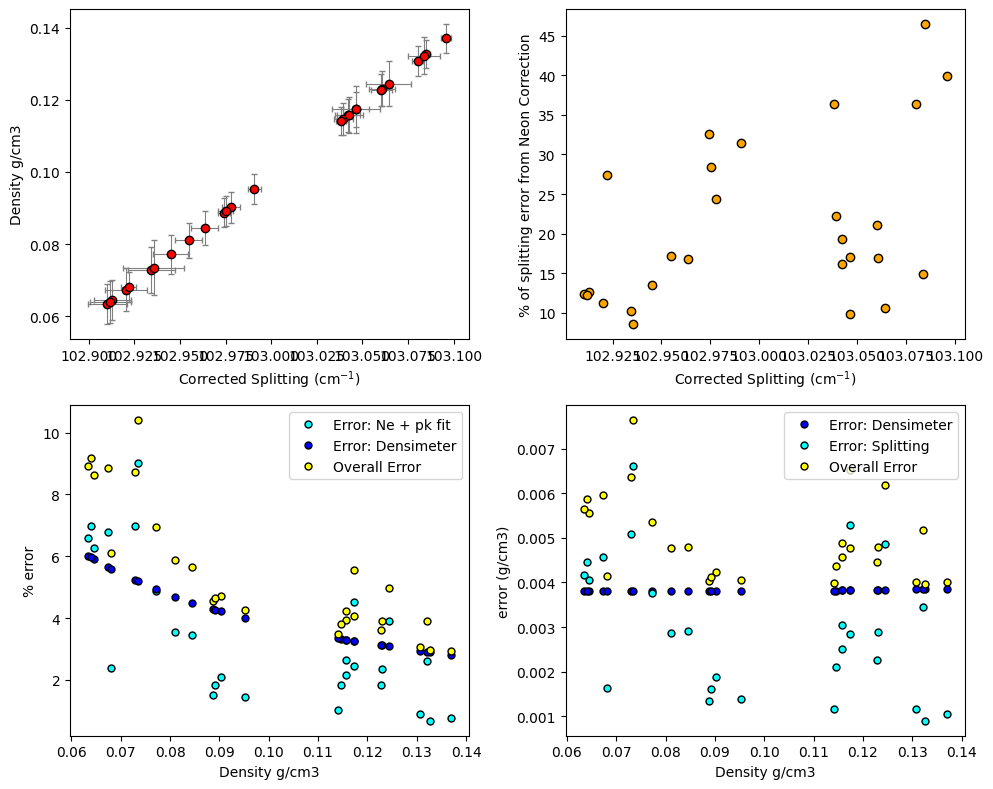

In [42]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

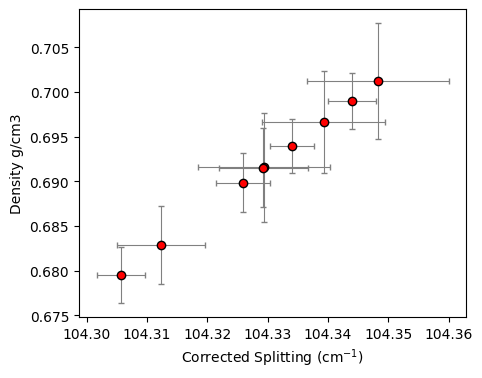

In [43]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [44]:
df

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_SO2,Peak_Area_SO2,Peak_Height_SO2,Model_name,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
28,FG04-A1-4-50X-start_r1,0.679494,0.003135,0.002031,0.002388,104.305655,0.004010,0.001531,0.003714,6.002,...,NaN,NaN,NaN,NaN,NaN,NaN,41701.0,0.997800,0.997785,0.997814
29,FG04-A1-4-50X-start_r2,0.699008,0.003154,0.002055,0.002393,104.343981,0.004016,0.001529,0.003722,5.977,...,NaN,NaN,NaN,NaN,NaN,NaN,41983.0,0.997800,0.997785,0.997815
30,FG04-A1-4-50X-start_r3,0.693926,0.003037,0.001871,0.002392,104.334036,0.003667,0.001525,0.003342,5.960,...,NaN,NaN,NaN,NaN,NaN,NaN,42331.0,0.997800,0.997786,0.997815
31,FG04-A1-4-100X-start_r4,0.701217,0.006477,0.006019,0.002393,104.348297,0.011751,0.001518,0.011678,5.971,...,NaN,NaN,NaN,NaN,NaN,NaN,43053.0,0.997801,0.997786,0.997815
32,FG04-A1-4-100X-start_r5,0.696614,0.005741,0.005218,0.002392,104.339301,0.010211,0.001514,0.010121,5.982,...,NaN,NaN,NaN,NaN,NaN,NaN,43480.0,0.997801,0.997787,0.997816
33,FG04-A1-4-100X-start_r6,0.691555,0.006080,0.005590,0.002391,104.329388,0.010967,0.001511,0.010887,5.999,...,NaN,NaN,NaN,NaN,NaN,NaN,43798.0,0.997801,0.997787,0.997816
34,FG04-A1-4-50X-end_r7,0.691514,0.004433,0.003733,0.002391,104.329307,0.007323,0.001610,0.007159,6.044,...,NaN,NaN,NaN,NaN,NaN,NaN,66248.0,0.997820,0.997804,0.997835
35,FG04-A1-4-50X-end_r8,0.682888,0.004391,0.003684,0.002389,104.312348,0.007260,0.001614,0.007093,6.048,...,NaN,NaN,NaN,NaN,NaN,NaN,66499.0,0.997820,0.997805,0.997835
36,FG04-A1-4-50X-end_r9,0.689823,0.003308,0.002287,0.002391,104.325989,0.004490,0.001619,0.004198,6.028,...,NaN,NaN,NaN,NaN,NaN,NaN,66791.0,0.997820,0.997805,0.997836


In [45]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

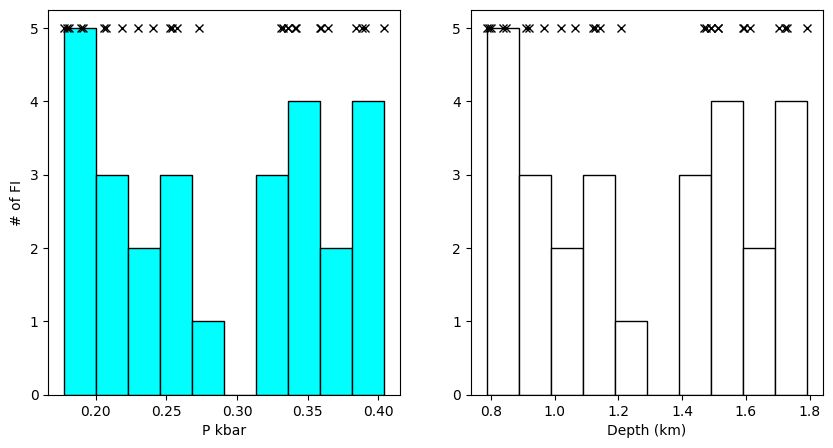

In [46]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [20]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step4 Stitch outputs is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()